In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [72]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

In [41]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [42]:
#FOLDER names are CLASS names

In [43]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [44]:
len(dataset) #every element in the dataset is the batch of 32 images

68

In [45]:
68*32 

2176

In [46]:
for image_batch, label_batch in dataset.take(1):  #This method creates a new dataset that contains only the first element from the original dataset. Here, it's taking the first batch.
    print(image_batch.shape) # ( number of images in the batch, height of each image, width of each image, number of color channels )
    print(label_batch.numpy()) # These are the label values for the batch

(32, 256, 256, 3)
[1 1 1 2 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 2 0 0 1 1 1 0 1 2 1 0 0]


In [47]:
#So, in each image of the batch, there are 256x256 pixels, and each pixel has three values representing the intensity of red, green, and blue. 

In [48]:
# To print the numerical values of the pixels in the first image of your image_batch, you can use numpy() to convert the TensorFlow tensor to a NumPy array
# The first_image will be a NumPy array, and print(first_image) will print the numerical values of the pixels in the first image.

# DATA VISUALIZATION

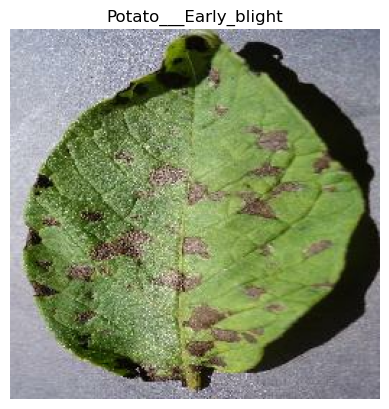

In [49]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")   

In [50]:
"""
Line 17 explanation: This line iterates over the elements of the dataset, but it only takes the first element due to take(1). 
In each iteration, image_batch contains a batch of images, and label_batch contains the corresponding labels.

This line uses plt.imshow() to display the image. It converts the TensorFlow tensor image_batch[0] to a NumPy array using
numpy(). The astype("uint8") is used to ensure that the pixel values are interpreted as unsigned 8-bit integers, which is 
the expected format for image data.

Here we sets the title of the plot using plt.title(). It retrieves the corresponding class name from the class_names
dictionary (or list) based on the label of the first image in the batch (label_batch[0]).
"""

'\nLine 17 explanation: This line iterates over the elements of the dataset, but it only takes the first element due to take(1). \nIn each iteration, image_batch contains a batch of images, and label_batch contains the corresponding labels.\n\nThis line uses plt.imshow() to display the image. It converts the TensorFlow tensor image_batch[0] to a NumPy array using\nnumpy(). The astype("uint8") is used to ensure that the pixel values are interpreted as unsigned 8-bit integers, which is \nthe expected format for image data.\n\nHere we sets the title of the plot using plt.title(). It retrieves the corresponding class name from the class_names\ndictionary (or list) based on the label of the first image in the batch (label_batch[0]).\n'

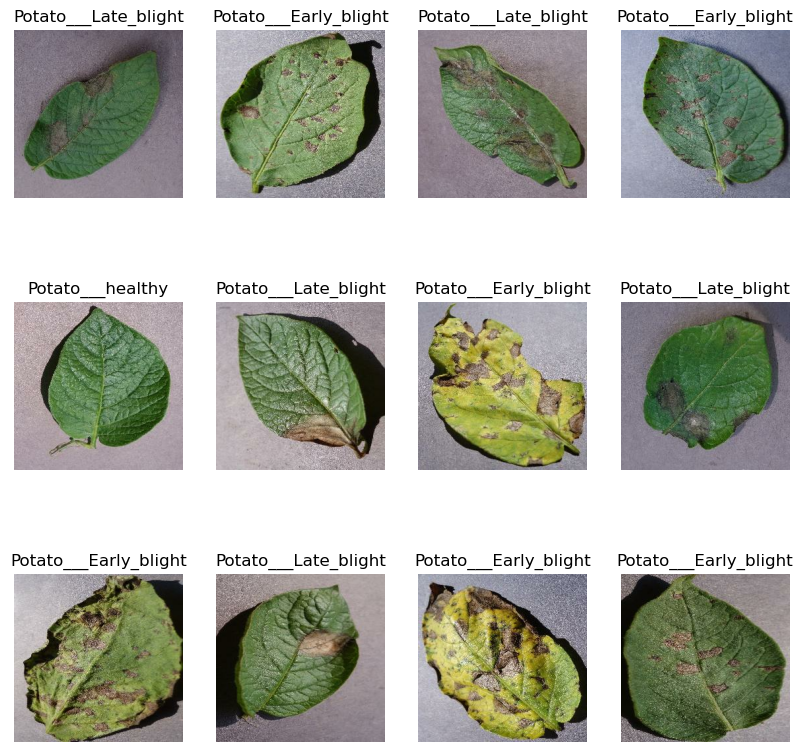

In [51]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")  

# Train Validate Test Split

In [52]:
"""
80% ==> training
20% ==> 10% validation, 10 % test
"""

'\n80% ==> training\n20% ==> 10% validation, 10 % test\n'

In [53]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [54]:
train_Ds = dataset.take(54) #taking the first 54 elements from the original dataset using take(54)
len(train_Ds)

54

In [55]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [56]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [57]:
val_ds = test_ds.take(6) #validation dataset
len(val_ds)

6

In [58]:
test_ds = test_ds.skip(6) #testing dataset
len(test_ds)

8

In [59]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1 , test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12) 
        
    train_size = int(train_split * ds_size)
    
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [60]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [61]:
len(train_ds)

54

In [62]:
len(val_ds)

6

In [63]:
len(test_ds)

8

In [64]:
#seed=12 initializes the random number generator with the seed value of 12. If you use the same seed elsewhere in your code or share it with others, they should get the same shuffling order when shuffling is applied.

In [65]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [66]:
"""
train_ds.cache():

cache() is used to cache the elements of the dataset in memory or on disk.
This can significantly speed up training, especially when working with complex input pipelines or
when the dataset doesn't fit into memory. Caching is most effective when the dataset doesn't change between epochs.

.shuffle(10000):

shuffle(10000) shuffles the elements of the dataset with a buffer size of 10,000.
The buffer size determines the number of elements from the dataset that the shuffle operation uses to
randomly sample and create a shuffled batch. A larger buffer size generally leads to a more thorough shuffling
but requires more memory.

.prefetch():

prefetch() is used to prefetch a certain number of batches (or elements) from the dataset to accelerate training.
Prefetching allows the model to start processing the next batch while the current batch is being used for training. 
This can lead to more efficient use of system resources and reduced training time.

tf.data.AUTOTUNE lets TensorFlow automatically determine the optimal buffer size based on available system resources.

"""

"\ntrain_ds.cache():\n\ncache() is used to cache the elements of the dataset in memory or on disk.\nThis can significantly speed up training, especially when working with complex input pipelines or\nwhen the dataset doesn't fit into memory. Caching is most effective when the dataset doesn't change between epochs.\n\n.shuffle(10000):\n\nshuffle(10000) shuffles the elements of the dataset with a buffer size of 10,000.\nThe buffer size determines the number of elements from the dataset that the shuffle operation uses to\nrandomly sample and create a shuffled batch. A larger buffer size generally leads to a more thorough shuffling\nbut requires more memory.\n\n.prefetch():\n\nprefetch() is used to prefetch a certain number of batches (or elements) from the dataset to accelerate training.\nPrefetching allows the model to start processing the next batch while the current batch is being used for training. \nThis can lead to more efficient use of system resources and reduced training time.\n\n

 # Data Augmentation 

In [67]:
resize_and_rescale = tf.keras.Sequential( [
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [68]:
"""
Resizing Layer:

The Resizing layer is used to resize the input images to a specific target size. 
It resizes the images to IMAGE_SIZE x IMAGE_SIZE.

Rescaling Layer:

The Rescaling layer is used to rescale the pixel values of the images.
It rescales the pixel  values by dividing them by 255, effectively bringing them into the range [0, 1].
"""

'\nResizing Layer:\n\nThe Resizing layer is used to resize the input images to a specific target size. \nIt resizes the images to IMAGE_SIZE x IMAGE_SIZE.\n\nRescaling Layer:\n\nThe Rescaling layer is used to rescale the pixel values of the images.\nIt rescales the pixel  values by dividing them by 255, effectively bringing them into the range [0, 1].\n'

In [69]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
"""
RandomFlip("horizontal_and_vertical"):

The RandomFlip layer is used for random horizontal and vertical flipping of input images. The argument "horizontal_and_vertical" specifies that flipping can occur along both the horizontal and vertical axes.

RandomRotation(0.2):

The RandomRotation layer is used for random rotations of input images. The argument 0.2 specifies the maximum angle of rotation in radians. In this case, images can be randomly rotated by up to 0.2 radians (which is approximately 11.46 degrees).

"""

# Build and Train a CNN Model

In [74]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    
])

model.build(input_shape = input_shape)

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
"""
model = models.Sequential([...]):

This line creates a sequential model, which is a linear stack of layers. The layers are defined inside the square brackets [].

Convolutional (Conv2D) and Pooling (MaxPooling2D) Layers:

These layers are used for feature extraction from the input images. Convolutional layers apply convolutional operations to 
learn features, and MaxPooling layers reduce spatial dimensions.

layers.Flatten():

This layer is used to flatten the output from the convolutional layers into a one-dimensional array. 
It prepares the data for the fully connected layers.

layers.Dense(64, activation='relu'):

This is a fully connected (dense) layer with 64 units and a Rectified Linear Unit (ReLU) activation function. 
It introduces non-linearity to the model.

layers.Dense(n_classes, activation='softmax'):

This is the output layer with a number of units equal to the number of classes (n_classes).
It uses the softmax activation function to convert the model's raw output into probability scores for each class.
"""

In [77]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']

)

In [ ]:
"""
The model.compile function is used to configure the training process of a neural network.

Optimizer (optimizer="adam"):

The optimizer is a crucial component of the training process.
"Adam" is a popular optimization algorithm that adapts the learning rates of each parameter individually based on their
past gradients. It is widely used due to its efficiency and effectiveness in a variety of tasks

Loss Function (loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)):

The loss function measures the difference between the model's predictions and the actual target values during training. 
In this case, we are using SparseCategoricalCrossentropy as the loss function. 
This loss is often used for classification tasks when the target labels are integers (i.e., sparse categorical labels).


from_logits=False
indicates that model's output is assumed to be probabilities, and
no additional activation function (like softmax) needs to be applied to the output during the computation of the loss function.
"""

In [78]:
model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50


54/54 [==============================] - 46s 703ms/step - loss: 0.9152 - accuracy: 0.4786 - val_loss: 0.8499 - val_accuracy: 0.4583
Epoch 2/50
54/54 [==============================] - 56s 1s/step - loss: 0.8263 - accuracy: 0.5920 - val_loss: 0.6780 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 62s 1s/step - loss: 0.5787 - accuracy: 0.7708 - val_loss: 0.5539 - val_accuracy: 0.7604
Epoch 4/50
54/54 [==============================] - 63s 1s/step - loss: 0.4431 - accuracy: 0.8113 - val_loss: 0.3846 - val_accuracy: 0.8385
Epoch 5/50
54/54 [==============================] - 65s 1s/step - loss: 0.3113 - accuracy: 0.8733 - val_loss: 0.4110 - val_accuracy: 0.7969
Epoch 6/50
54/54 [==============================] - 61s 1s/step - loss: 0.2282 - accuracy: 0.9091 - val_loss: 0.2306 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 65s 1s/step - loss: 0.1814 - accuracy: 0.9334 - val_loss: 0.1703 - val_accuracy: 0.9219
Epoch 8/50
54/5

In [ ]:
"""

The model.fit function is used to train the neural network on a given dataset.

train_ds:
This is the training dataset that the model will be trained on. 
It contains batches of input data and corresponding target labels.

epochs=EPOCHS:
The number of epochs specifies how many times the entire training dataset will be passed forward and backward through
the neural network. An epoch is a complete iteration over the training dataset.

batch_size=BATCH_SIZE:
The batch size determines the number of samples that will be used in each iteration (forward and backward pass) of training.
Smaller batch sizes consume less memory but may slow down training, 
while larger batch sizes can speed up training but require more memory.

verbose=1:
The verbose argument controls the verbosity of the training output. 
Setting it to 1 means you'll see progress bars for each epoch during training.
If set to 0, there will be no output during training (silent mode). If set to 2, a simplified progress bar will be displayed.


- 36s 671ms/step: Provides information about the time taken for each batch. 
In this case, each batch took approximately 36 seconds and 671 milliseconds to process.

Training Loss (0.0233):
A lower training loss indicates that the predicted values are closer to the actual values. 
Here, a loss of 0.0233 is relatively low, suggesting that the model is fitting the training data well.

Training Accuracy (99.07%):
a training accuracy of 99.07% means that, based on the model's predictions, approximately 99.07% of the examples in the training dataset were correctly classified.
"""

In [81]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 154ms/step - loss: 0.0645 - accuracy: 0.9688


In [82]:
scores

[0.06449350714683533, 0.96875]